In [ ]:
#Importing all necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reviews dataset:**


Importing Reviews Dataset


Source:Amazon

In [ ]:
reviews = pd.read_json('/content/drive/MyDrive/Machine Learning/Kindle_Store_5.json', lines=True)
reviews.sample(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
218741,ALV0UIJEVXZ2G,B007YJEIAS,"J. Savoy ""J. Savoy""","[0, 0]",This is an okay book for the beginning writer ...,3,Okay for beginners,1349481600,"10 6, 2012"
402564,A2WEMLQUPGZDA2,B00AZ7YSFQ,Nicolas Wilson,"[2, 2]",Review by Nic's wife.I was pleasantly surprise...,4,"A few flaws, but a fun scifi.",1398643200,"04 28, 2014"
482,A1H1XHRSHFACTW,B000NJL7Y6,Tamila Robins,"[0, 0]",I love anything that Brenda Jackson writes and...,5,Wonderful!!!!!!!!!!!!!,1363046400,"03 12, 2013"
283441,A24BM1FIA3LKUW,B008YQJEFY,nancy,"[1, 1]","Interesting, yet bazaar. It kept one on edge ...",4,The mystery box,1392249600,"02 13, 2014"
50879,A1M9J2GASVAASD,B004QGY35W,Stephy,"[0, 0]",This book was great! I love the series and thi...,5,LOVE IT,1308700800,"06 22, 2011"


**Starting the Preprocessing**

Finding the shape of the review data set:

In [ ]:
reviews.shape

(982619, 9)

In [ ]:
ratings = pd.DataFrame([reviews.reviewerID, reviews.asin, reviews.overall]).transpose()
ratings.shape

(982619, 3)

For better readability changing the 'reviewerID 'to' userID','asin' to 'productID','overall' to 'rating':

---



In [ ]:
ratings.rename(columns={
    'reviewerID':'userID',
    'asin':'productID',
    'overall':'rating'
}, inplace=True)

In [ ]:
ratings.head()

,userID,productID,rating
0,A1F6404F1VG29J,B000F83SZQ,5
1,AN0N05A9LIJEQ,B000F83SZQ,4
2,A795DMNCJILA6,B000F83SZQ,4
3,A1FV0SX13TWVXQ,B000F83SZQ,5
4,A3SPTOKDG7WBLN,B000F83SZQ,4


Converting the object type of string format of rating to numeric format of rating 

In [ ]:
ratings['rating'] = pd.to_numeric(ratings['rating'])

Identifying the datatypes of each column of the ratings dataset

In [ ]:
ratings.dtypes

userID       object
productID    object
rating        int64
dtype: object

Identifying the null data:

As a conclusion we can see that there are no null values or nan values:

In [ ]:
ratings.isnull().sum()

userID       0
productID    0
rating       0
dtype: int64

Satistical analysis of the ratings:

From the below statistical analysis we can come to the conclusion that the rating scale range from 1 to 5.

Total count of Customer ratings is 982619

25% of the customer rating for the books are 4.

70% and 50% of the customer ratings are 5.

In [ ]:
ratings.rating.describe()

count    982619.000000
mean          4.347801
std           0.955056
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
print("No of Total ratings =",ratings.shape[0])
print("No of Unique users =",len(ratings.userID.unique()))
print("No of Unique products =",len(ratings.productID.unique()))

No of Total ratings = 982619
No of Unique users = 68223
No of Unique products = 61934


Exploratary Data Analysis of the data:

By plotting the ratings in a scale of 1 to 5 against the customers 

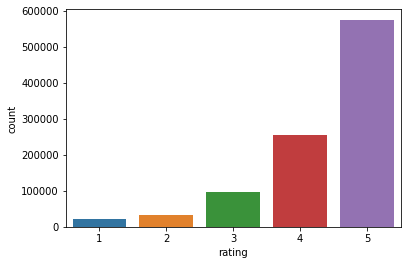

In [ ]:
sns.countplot(x='rating', data=ratings)

Grouping the productID with that of the ratings to check through which product id has more rating:

In [ ]:
ratings.groupby('productID')['rating'].mean().sort_values(ascending=False).sample(10)

productID
B005CRQ5AK    4.352941
B008VGBQTO    4.157895
B00GDR4X0W    5.000000
B00CC9DKUY    4.769231
B00I8CV9PC    4.103448
B00IHSI2WA    3.807692
B00F0OUL6O    3.937500
B002NOGFHS    3.600000
B00BRY7ZR4    4.421053
B00AGR5ZPW    4.666667
Name: rating, dtype: float64

Checking through userids and their corresponding rating and grouping them and sorting them according to the highest ratings

In [ ]:
# Active users
ratings.groupby('userID')['rating'].count().sort_values(ascending=False)

userID
A13QTZ8CIMHHG4    1173
A2WZJDFX12QXKD    1007
A320TMDV6KCFU      847
A3PTWPKPXOG8Y5     789
A1JLU5H1CCENWX     782
                  ... 
A2XQNMBRFLH539       5
A2XQNY6FNZ8XYL       5
A2XQT4HFUM5K13       5
A2XREU38W4XMI4       5
A2JYBNXB2UFSO0       5
Name: rating, Length: 68223, dtype: int64

Popular products:

finding the popular products by grouping the prouductID and rating and then sorting them and have displayed as a bar plot:

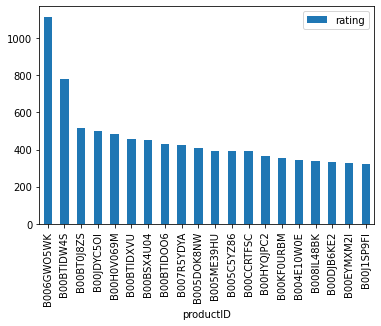

In [ ]:
popular20 = pd.DataFrame(ratings.groupby('productID')['rating'].count().sort_values(ascending=False).head(20))
popular20.plot(kind='bar')

Popular 20 products:

In [ ]:
popular20

,rating
productID,
B006GWO5WK,1113
B00BTIDW4S,781
B00BT0J8ZS,516
B00JDYC5OI,502
B00H0V069M,481
B00BTIDXVU,454
B00BSX4U04,452
B00BTIDOO6,428
B007R5YDYA,422


Removing unnessary columns:

1.reviewerName-we have removed this name because it doesnt help us to identify the best sold book which is our ultimate aim

2.helpful-

3.overall-

4.unixReviewTime-

5.reviewTime-


In [ ]:
reviews.drop(columns=['reviewerName','helpful','overall','unixReviewTime','reviewTime'], inplace=True)
reviews

,reviewerID,asin,reviewText,summary
0,A1F6404F1VG29J,B000F83SZQ,I enjoy vintage books and movies so I enjoyed ...,Nice vintage story
1,AN0N05A9LIJEQ,B000F83SZQ,This book is a reissue of an old one; the auth...,Different...
2,A795DMNCJILA6,B000F83SZQ,This was a fairly interesting read. It had ol...,Oldie
3,A1FV0SX13TWVXQ,B000F83SZQ,I'd never read any of the Amy Brewster mysteri...,I really liked it.
4,A3SPTOKDG7WBLN,B000F83SZQ,"If you like period pieces - clothing, lingo, y...",Period Mystery
...,...,...,...,...
982614,A2Y66HD4J5S7QZ,B00M13FNSS,Yasss hunny! This is a great read. That Dre is...,A Hot Read Indeed!!
982615,A17YHECC8H9NEY,B00M13FNSS,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,VERY GOOD BOOK
982616,A20KO0BPMNREJL,B00M13FNSS,Great book! Cherika was a fool. She let that m...,Great Read
982617,A1BQO66R6OLCCW,B00M13FNSS,When I say this was an excellent book please b...,Wow!!


Finding if there is any duplicate value:

In [ ]:
reviews.duplicated().sum()

0

Meta Data whihc is the supplementary data which adds on information of the particular book including title,caategory and so on.

In [ ]:
meta_data = pd.read_json('/content/drive/MyDrive/Machine Learning/meta_Kindle_Store.json',lines=True)
meta_data.sample(3)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
349861,"[Kindle Store, Kindle eBooks, Religion & Spiri...",,[],,A Fun Way to Connect With Bible Stories (Creat...,[],,Visit Amazon's EK Jasmine Page,[],"4,091,929 Paid in Kindle Store (",[],"{'File Size:': '16723 KB', 'Print Length:': '2...",Buy a Kindle,,NaT,,B00TJOX8K2,[],[]
11649,"[Kindle Store, Kindle eBooks, Education & Teac...",,[],,Essential Math Made Simple (Basic Math Skills...,[],,Orsolina Cetta,[],"2,332,492 Paid in Kindle Store (",[],"{'File Size:': '3510 KB', 'Print Length:': '72...",Buy a Kindle,,NaT,,B003URRQW0,[],[]
287480,"[Kindle Store, Kindle eBooks, Religion & Spiri...",,[],,Faith Walk - Kindle edition,[],,Faith Walker Marshall,[],"4,155,799 Paid in Kindle Store (",[],"{'File Size:': '501 KB', 'Print Length:': '120...",Buy a Kindle,,NaT,,B00M4984US,[],[]


In [ ]:
meta_data.dtypes

category                   object
tech1                      object
description                object
fit                        object
title                      object
also_buy                   object
tech2                      object
brand                      object
feature                    object
rank                       object
also_view                  object
details                    object
main_cat                   object
similar_item               object
date               datetime64[ns]
price                      object
asin                       object
imageURL                   object
imageURLHighRes            object
dtype: object

Replacing empty spaces value with nan value

Setting feature,description,imageurl and imageurlhighresolution as bool types to easily delete them.

In [ ]:
meta_data.replace("",np.nan,inplace=True)
meta_data['description'] = meta_data['description'].astype(bool)
meta_data['feature'] = meta_data['feature'].astype(bool)
meta_data['imageURL'] = meta_data['imageURL'].astype(bool)
meta_data['imageURLHighRes'] = meta_data['imageURLHighRes'].astype(bool)
meta_data.replace(False,np.nan,inplace=True)

In [ ]:
meta_data.isnull().sum()

category                0
tech1              491670
description        491670
fit                491670
title                2760
also_buy                0
tech2              491670
brand                1524
feature            491670
rank                    0
also_view               0
details                 0
main_cat               41
similar_item       491670
date               491670
price              491591
asin                    0
imageURL           491652
imageURLHighRes    491652
dtype: int64

In [ ]:
meta_data.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes'],
      dtype='object')

Since we have same number of rows in null value and the actual columns 

We have planned to remove the following columns:
'description','tech1','fit','tech2','feature','similar_item','date','price','imageURL','imageURLHighRes'

In [ ]:
meta_data.drop(columns=['description','tech1','fit','tech2','feature','similar_item','date','price','imageURL','imageURLHighRes'],inplace=True)
meta_data

,category,title,also_buy,brand,rank,also_view,details,main_cat,asin
0,"[Kindle Store, Kindle eBooks, Science Fiction ...",NaN,"[B007NLCJBC, B01FARODH8]",Arthur K. Barnes,"1,716,849 Paid in Kindle Store (","[B000FBF81K, B00PBDMER8]","{'File Size:': '295 KB', 'Print Length:': '113...",Buy a Kindle,B000FA5KKA
1,"[Kindle Store, Kindle eBooks, Engineering & Tr...",NaN,"[B00AYWTHZS, B071CTK28D]",Visit Amazon's Paul A. Craig Page,"1,683,973 Paid in Kindle Store (",[B00AYWTHZS],"{'File Size:': '1648 KB', 'Print Length:': '26...",Buy a Kindle,B000FA5M3K
2,"[Kindle Store, Kindle eBooks, Biographies & Me...",NaN,[],Jean Marie Stine,"3,394,136 Paid in Kindle Store (",[],"{'File Size:': '262 KB', 'Print Length:': '103...",Buy a Kindle,B000FA5KJQ
3,"[Kindle Store, Kindle eBooks, Science Fiction ...",NaN,[],Arthur K. Barnes,"1,884,541 Paid in Kindle Store (",[],"{'File Size:': '251 KB', 'Print Length:': '116...",Buy a Kindle,B000FA5NSO
4,"[Kindle Store, Kindle eBooks, Business & Money]",NaN,"[B000SEGKF2, B004774LR0, B018LE1KUK, B0015DRO7...",Visit Amazon's Ethan M. Rasiel Page,"72,075 Paid in Kindle Store (","[B018LE1KUK, B000SEGKF2, B007XWFZSA, B0015DRO7...","{'File Size:': '953 KB', 'Print Length:': '187...",Buy a Kindle,B000FA5KX2
...,...,...,...,...,...,...,...,...,...
491665,"[Kindle Store, Kindle eBooks, Science Fiction ...",Den of Dark Angels eBook,[],Visit Amazon's Kenna McKinnon Page,"8,671 Free in Kindle Store (","[B07LB2LY17, B07DMZJ29M, B00O3GTJEU, B077XG66X...","{'File Size:': '1918 KB', 'Print Length:': '30...",Buy a Kindle,B01HJDS9W6
491666,"[Kindle Store, Kindle eBooks, Literature & Fic...",Poison Kisses 2: My Best Kept Secret - Kindle ...,"[B01F1X1630, B07C7G3YFN, B07CYV92TH]",Visit Amazon's Kia Meche' Page,"743,760 Paid in Kindle Store (",[B01F1X1630],"{'File Size:': '3159 KB', 'Print Length:': '15...",Buy a Kindle,B01HJENY3Y
491667,"[Kindle Store, Kindle eBooks, Religion & Spiri...",Renewing Your Mind!: Secrets to Having All You...,"[B06VVS5NTN, B01BWYW7DK, B01K7T52JM, B079DTMZR...",Visit Amazon's MICHAEL ENDWELL Page,"573,570 Paid in Kindle Store (","[B06VVS5NTN, B01K9D9EKE, B07HRLXB59, B071HBRKN...","{'File Size:': '658 KB', 'Print Length:': '37 ...",Buy a Kindle,B01HJFVTKS
491668,"[Kindle Store, Kindle eBooks, Literature & Fic...",Restless Daniel No Ordinary Boy: A child&#39;s...,[],Visit Amazon's Cally Finsbury Page,"2,661,876 Paid in Kindle Store (",[],"{'File Size:': '177 KB', 'Print Length:': '47 ...",Buy a Kindle,B01HJH8CDS


In [ ]:
meta_data.rank

<bound method NDFrame.rank of                                                  category  ...        asin
0       [Kindle Store, Kindle eBooks, Science Fiction ...  ...  B000FA5KKA
1       [Kindle Store, Kindle eBooks, Engineering & Tr...  ...  B000FA5M3K
2       [Kindle Store, Kindle eBooks, Biographies & Me...  ...  B000FA5KJQ
3       [Kindle Store, Kindle eBooks, Science Fiction ...  ...  B000FA5NSO
4         [Kindle Store, Kindle eBooks, Business & Money]  ...  B000FA5KX2
...                                                   ...  ...         ...
491665  [Kindle Store, Kindle eBooks, Science Fiction ...  ...  B01HJDS9W6
491666  [Kindle Store, Kindle eBooks, Literature & Fic...  ...  B01HJENY3Y
491667  [Kindle Store, Kindle eBooks, Religion & Spiri...  ...  B01HJFVTKS
491668  [Kindle Store, Kindle eBooks, Literature & Fic...  ...  B01HJH8CDS
491669  [Kindle Store, Kindle eBooks, Literature & Fic...  ...  B01HJH82WY

[491670 rows x 9 columns]>

In [ ]:
meta_data.category

0         [Kindle Store, Kindle eBooks, Science Fiction ...
1         [Kindle Store, Kindle eBooks, Engineering & Tr...
2         [Kindle Store, Kindle eBooks, Biographies & Me...
3         [Kindle Store, Kindle eBooks, Science Fiction ...
4           [Kindle Store, Kindle eBooks, Business & Money]
                                ...                        
491665    [Kindle Store, Kindle eBooks, Science Fiction ...
491666    [Kindle Store, Kindle eBooks, Literature & Fic...
491667    [Kindle Store, Kindle eBooks, Religion & Spiri...
491668    [Kindle Store, Kindle eBooks, Literature & Fic...
491669    [Kindle Store, Kindle eBooks, Literature & Fic...
Name: category, Length: 491670, dtype: object

In [ ]:
meta_data.drop(columns=['rank'],inplace =True)
meta_data

,category,title,also_buy,brand,also_view,details,main_cat,asin
0,"[Kindle Store, Kindle eBooks, Science Fiction ...",NaN,"[B007NLCJBC, B01FARODH8]",Arthur K. Barnes,"[B000FBF81K, B00PBDMER8]","{'File Size:': '295 KB', 'Print Length:': '113...",Buy a Kindle,B000FA5KKA
1,"[Kindle Store, Kindle eBooks, Engineering & Tr...",NaN,"[B00AYWTHZS, B071CTK28D]",Visit Amazon's Paul A. Craig Page,[B00AYWTHZS],"{'File Size:': '1648 KB', 'Print Length:': '26...",Buy a Kindle,B000FA5M3K
2,"[Kindle Store, Kindle eBooks, Biographies & Me...",NaN,[],Jean Marie Stine,[],"{'File Size:': '262 KB', 'Print Length:': '103...",Buy a Kindle,B000FA5KJQ
3,"[Kindle Store, Kindle eBooks, Science Fiction ...",NaN,[],Arthur K. Barnes,[],"{'File Size:': '251 KB', 'Print Length:': '116...",Buy a Kindle,B000FA5NSO
4,"[Kindle Store, Kindle eBooks, Business & Money]",NaN,"[B000SEGKF2, B004774LR0, B018LE1KUK, B0015DRO7...",Visit Amazon's Ethan M. Rasiel Page,"[B018LE1KUK, B000SEGKF2, B007XWFZSA, B0015DRO7...","{'File Size:': '953 KB', 'Print Length:': '187...",Buy a Kindle,B000FA5KX2
...,...,...,...,...,...,...,...,...
491665,"[Kindle Store, Kindle eBooks, Science Fiction ...",Den of Dark Angels eBook,[],Visit Amazon's Kenna McKinnon Page,"[B07LB2LY17, B07DMZJ29M, B00O3GTJEU, B077XG66X...","{'File Size:': '1918 KB', 'Print Length:': '30...",Buy a Kindle,B01HJDS9W6
491666,"[Kindle Store, Kindle eBooks, Literature & Fic...",Poison Kisses 2: My Best Kept Secret - Kindle ...,"[B01F1X1630, B07C7G3YFN, B07CYV92TH]",Visit Amazon's Kia Meche' Page,[B01F1X1630],"{'File Size:': '3159 KB', 'Print Length:': '15...",Buy a Kindle,B01HJENY3Y
491667,"[Kindle Store, Kindle eBooks, Religion & Spiri...",Renewing Your Mind!: Secrets to Having All You...,"[B06VVS5NTN, B01BWYW7DK, B01K7T52JM, B079DTMZR...",Visit Amazon's MICHAEL ENDWELL Page,"[B06VVS5NTN, B01K9D9EKE, B07HRLXB59, B071HBRKN...","{'File Size:': '658 KB', 'Print Length:': '37 ...",Buy a Kindle,B01HJFVTKS
491668,"[Kindle Store, Kindle eBooks, Literature & Fic...",Restless Daniel No Ordinary Boy: A child&#39;s...,[],Visit Amazon's Cally Finsbury Page,[],"{'File Size:': '177 KB', 'Print Length:': '47 ...",Buy a Kindle,B01HJH8CDS


In [ ]:
meta_data.drop(columns=['details'],inplace =True)
meta_data

,category,title,also_buy,brand,also_view,main_cat,asin
0,"[Kindle Store, Kindle eBooks, Science Fiction ...",NaN,"[B007NLCJBC, B01FARODH8]",Arthur K. Barnes,"[B000FBF81K, B00PBDMER8]",Buy a Kindle,B000FA5KKA
1,"[Kindle Store, Kindle eBooks, Engineering & Tr...",NaN,"[B00AYWTHZS, B071CTK28D]",Visit Amazon's Paul A. Craig Page,[B00AYWTHZS],Buy a Kindle,B000FA5M3K
2,"[Kindle Store, Kindle eBooks, Biographies & Me...",NaN,[],Jean Marie Stine,[],Buy a Kindle,B000FA5KJQ
3,"[Kindle Store, Kindle eBooks, Science Fiction ...",NaN,[],Arthur K. Barnes,[],Buy a Kindle,B000FA5NSO
4,"[Kindle Store, Kindle eBooks, Business & Money]",NaN,"[B000SEGKF2, B004774LR0, B018LE1KUK, B0015DRO7...",Visit Amazon's Ethan M. Rasiel Page,"[B018LE1KUK, B000SEGKF2, B007XWFZSA, B0015DRO7...",Buy a Kindle,B000FA5KX2
...,...,...,...,...,...,...,...
491665,"[Kindle Store, Kindle eBooks, Science Fiction ...",Den of Dark Angels eBook,[],Visit Amazon's Kenna McKinnon Page,"[B07LB2LY17, B07DMZJ29M, B00O3GTJEU, B077XG66X...",Buy a Kindle,B01HJDS9W6
491666,"[Kindle Store, Kindle eBooks, Literature & Fic...",Poison Kisses 2: My Best Kept Secret - Kindle ...,"[B01F1X1630, B07C7G3YFN, B07CYV92TH]",Visit Amazon's Kia Meche' Page,[B01F1X1630],Buy a Kindle,B01HJENY3Y
491667,"[Kindle Store, Kindle eBooks, Religion & Spiri...",Renewing Your Mind!: Secrets to Having All You...,"[B06VVS5NTN, B01BWYW7DK, B01K7T52JM, B079DTMZR...",Visit Amazon's MICHAEL ENDWELL Page,"[B06VVS5NTN, B01K9D9EKE, B07HRLXB59, B071HBRKN...",Buy a Kindle,B01HJFVTKS
491668,"[Kindle Store, Kindle eBooks, Literature & Fic...",Restless Daniel No Ordinary Boy: A child&#39;s...,[],Visit Amazon's Cally Finsbury Page,[],Buy a Kindle,B01HJH8CDS


We need only the particular category since we are dealing only with the kindle books it isnt explicitly needed to mention that it is a e book so we need the 3rd element of the string category 

In [ ]:
meta_data.category[1][2]

'Engineering & Transportation'

Filling the title whih is not known with Not Known since there are only less values

In [ ]:
meta_data.title.fillna("Not_known",inplace=True)

As mentioned above all the category is moved to the new column Correct_category

In [ ]:
meta_data["Correct_Category"] = meta_data.category.str[2]
meta_data.Correct_Category

0            Science Fiction & Fantasy
1         Engineering & Transportation
2                Biographies & Memoirs
3            Science Fiction & Fantasy
4                     Business & Money
                      ...             
491665       Science Fiction & Fantasy
491666            Literature & Fiction
491667         Religion & Spirituality
491668            Literature & Fiction
491669            Literature & Fiction
Name: Correct_Category, Length: 491670, dtype: object

In [ ]:
meta_data

,category,title,also_buy,brand,also_view,main_cat,asin,Correct_Category
0,"[Kindle Store, Kindle eBooks, Science Fiction ...",Not_known,"[B007NLCJBC, B01FARODH8]",Arthur K. Barnes,"[B000FBF81K, B00PBDMER8]",Buy a Kindle,B000FA5KKA,Science Fiction & Fantasy
1,"[Kindle Store, Kindle eBooks, Engineering & Tr...",Not_known,"[B00AYWTHZS, B071CTK28D]",Visit Amazon's Paul A. Craig Page,[B00AYWTHZS],Buy a Kindle,B000FA5M3K,Engineering & Transportation
2,"[Kindle Store, Kindle eBooks, Biographies & Me...",Not_known,[],Jean Marie Stine,[],Buy a Kindle,B000FA5KJQ,Biographies & Memoirs
3,"[Kindle Store, Kindle eBooks, Science Fiction ...",Not_known,[],Arthur K. Barnes,[],Buy a Kindle,B000FA5NSO,Science Fiction & Fantasy
4,"[Kindle Store, Kindle eBooks, Business & Money]",Not_known,"[B000SEGKF2, B004774LR0, B018LE1KUK, B0015DRO7...",Visit Amazon's Ethan M. Rasiel Page,"[B018LE1KUK, B000SEGKF2, B007XWFZSA, B0015DRO7...",Buy a Kindle,B000FA5KX2,Business & Money
...,...,...,...,...,...,...,...,...
491665,"[Kindle Store, Kindle eBooks, Science Fiction ...",Den of Dark Angels eBook,[],Visit Amazon's Kenna McKinnon Page,"[B07LB2LY17, B07DMZJ29M, B00O3GTJEU, B077XG66X...",Buy a Kindle,B01HJDS9W6,Science Fiction & Fantasy
491666,"[Kindle Store, Kindle eBooks, Literature & Fic...",Poison Kisses 2: My Best Kept Secret - Kindle ...,"[B01F1X1630, B07C7G3YFN, B07CYV92TH]",Visit Amazon's Kia Meche' Page,[B01F1X1630],Buy a Kindle,B01HJENY3Y,Literature & Fiction
491667,"[Kindle Store, Kindle eBooks, Religion & Spiri...",Renewing Your Mind!: Secrets to Having All You...,"[B06VVS5NTN, B01BWYW7DK, B01K7T52JM, B079DTMZR...",Visit Amazon's MICHAEL ENDWELL Page,"[B06VVS5NTN, B01K9D9EKE, B07HRLXB59, B071HBRKN...",Buy a Kindle,B01HJFVTKS,Religion & Spirituality
491668,"[Kindle Store, Kindle eBooks, Literature & Fic...",Restless Daniel No Ordinary Boy: A child&#39;s...,[],Visit Amazon's Cally Finsbury Page,[],Buy a Kindle,B01HJH8CDS,Literature & Fiction


Removing the old category column

In [ ]:
meta_data.drop(columns=['category'],inplace =True)
meta_data

,title,also_buy,brand,also_view,main_cat,asin,Correct_Category
0,Not_known,"[B007NLCJBC, B01FARODH8]",Arthur K. Barnes,"[B000FBF81K, B00PBDMER8]",Buy a Kindle,B000FA5KKA,Science Fiction & Fantasy
1,Not_known,"[B00AYWTHZS, B071CTK28D]",Visit Amazon's Paul A. Craig Page,[B00AYWTHZS],Buy a Kindle,B000FA5M3K,Engineering & Transportation
2,Not_known,[],Jean Marie Stine,[],Buy a Kindle,B000FA5KJQ,Biographies & Memoirs
3,Not_known,[],Arthur K. Barnes,[],Buy a Kindle,B000FA5NSO,Science Fiction & Fantasy
4,Not_known,"[B000SEGKF2, B004774LR0, B018LE1KUK, B0015DRO7...",Visit Amazon's Ethan M. Rasiel Page,"[B018LE1KUK, B000SEGKF2, B007XWFZSA, B0015DRO7...",Buy a Kindle,B000FA5KX2,Business & Money
...,...,...,...,...,...,...,...
491665,Den of Dark Angels eBook,[],Visit Amazon's Kenna McKinnon Page,"[B07LB2LY17, B07DMZJ29M, B00O3GTJEU, B077XG66X...",Buy a Kindle,B01HJDS9W6,Science Fiction & Fantasy
491666,Poison Kisses 2: My Best Kept Secret - Kindle ...,"[B01F1X1630, B07C7G3YFN, B07CYV92TH]",Visit Amazon's Kia Meche' Page,[B01F1X1630],Buy a Kindle,B01HJENY3Y,Literature & Fiction
491667,Renewing Your Mind!: Secrets to Having All You...,"[B06VVS5NTN, B01BWYW7DK, B01K7T52JM, B079DTMZR...",Visit Amazon's MICHAEL ENDWELL Page,"[B06VVS5NTN, B01K9D9EKE, B07HRLXB59, B071HBRKN...",Buy a Kindle,B01HJFVTKS,Religion & Spirituality
491668,Restless Daniel No Ordinary Boy: A child&#39;s...,[],Visit Amazon's Cally Finsbury Page,[],Buy a Kindle,B01HJH8CDS,Literature & Fiction


Since the main_cat is having only one value that is the Buy a kindle it isnt much of use when we are handing only for a particular section as in here we are dealing only with only kindle books

In [ ]:
meta_data.main_cat.unique()

array(['Buy a Kindle', nan], dtype=object)

In [ ]:
meta_data.drop(columns=['main_cat'],inplace =True)
meta_data

,title,also_buy,brand,also_view,asin,Correct_Category
0,Not_known,"[B007NLCJBC, B01FARODH8]",Arthur K. Barnes,"[B000FBF81K, B00PBDMER8]",B000FA5KKA,Science Fiction & Fantasy
1,Not_known,"[B00AYWTHZS, B071CTK28D]",Visit Amazon's Paul A. Craig Page,[B00AYWTHZS],B000FA5M3K,Engineering & Transportation
2,Not_known,[],Jean Marie Stine,[],B000FA5KJQ,Biographies & Memoirs
3,Not_known,[],Arthur K. Barnes,[],B000FA5NSO,Science Fiction & Fantasy
4,Not_known,"[B000SEGKF2, B004774LR0, B018LE1KUK, B0015DRO7...",Visit Amazon's Ethan M. Rasiel Page,"[B018LE1KUK, B000SEGKF2, B007XWFZSA, B0015DRO7...",B000FA5KX2,Business & Money
...,...,...,...,...,...,...
491665,Den of Dark Angels eBook,[],Visit Amazon's Kenna McKinnon Page,"[B07LB2LY17, B07DMZJ29M, B00O3GTJEU, B077XG66X...",B01HJDS9W6,Science Fiction & Fantasy
491666,Poison Kisses 2: My Best Kept Secret - Kindle ...,"[B01F1X1630, B07C7G3YFN, B07CYV92TH]",Visit Amazon's Kia Meche' Page,[B01F1X1630],B01HJENY3Y,Literature & Fiction
491667,Renewing Your Mind!: Secrets to Having All You...,"[B06VVS5NTN, B01BWYW7DK, B01K7T52JM, B079DTMZR...",Visit Amazon's MICHAEL ENDWELL Page,"[B06VVS5NTN, B01K9D9EKE, B07HRLXB59, B071HBRKN...",B01HJFVTKS,Religion & Spirituality
491668,Restless Daniel No Ordinary Boy: A child&#39;s...,[],Visit Amazon's Cally Finsbury Page,[],B01HJH8CDS,Literature & Fiction
